In [1]:
# TASK -1 Select the given dataset "Income.csv" and calculate the proportion of people (area under curve) and
# zscore values for loan amount sanctioned between 100 and 160.
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import pandas as pd
dt = pd.read_csv("/content/Income.csv")
fil_dt = dt[(dt['LoanAmount']>= 100) & (dt['LoanAmount']<=160)]

a = 100
b = 160

m = np.mean (fil_dt['LoanAmount'])
sigma = np.std(fil_dt['LoanAmount'])

z1 = (a-m)/sigma
z2 = (b-m)/sigma

area = norm.cdf(z2) - norm.cdf(z1)
print("Area to the left of zb =",norm.cdf(z1))
print("Area to the left of za =",norm.cdf(z2))
print("Area between za and zb = z2-z1 =",area)

Area to the left of zb = 0.9723682821500639
Area to the left of za = 0.05617745211879772
Area between za and zb = z2-z1 = 0.9161908300312661


# New Section

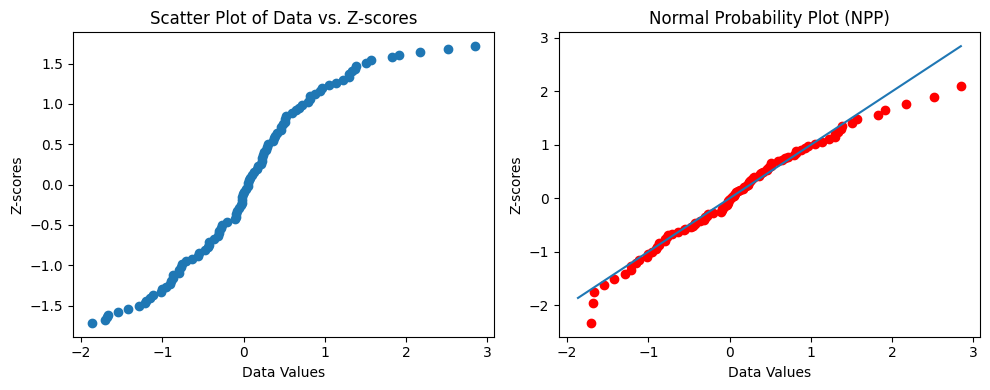

In [3]:
# TASK - 2 Generate random data (e.g., 100 samples) and create a Normal Probability Plot (NPP) for this data.
#Analyze the plot and discuss whether the data appears to follow a normal distribution.


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore, norm

data = pd.read_csv("/content/Income.csv")

# Function to create a Normal Probability Plot (NPP)
def create_npp(dat):
    # Sort the data
    dat = sorted(dat)

    # Calculate the probability for each data point
    p = [(dat.index(i)-0.5)/len(dat) for i in dat]

    # Calculate the Z-scores for the probabilities
    z_scores = zscore(p)

    # Create a scatter plot of data vs. Z-scores
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.scatter(dat, z_scores)
    plt.xlabel('Data Values')
    plt.ylabel('Z-scores')
    plt.title('Scatter Plot of Data vs. Z-scores')

    # Create a line plot of data vs. theoretical Z-scores
    plt.subplot(1, 2, 2)
    theoretical_z_scores = [norm.ppf(i, np.mean(dat), np.std(dat)) for i in p]
    plt.plot(dat, theoretical_z_scores, 'ro', dat, dat)
    plt.xlabel('Data Values')
    plt.ylabel('Z-scores')
    plt.title('Normal Probability Plot (NPP)')

    plt.tight_layout()
    plt.show()

# Generating NPP for random data
n = 100
random_dat = np.random.randn(n)
create_npp(random_dat)

In [4]:
# Analising the NPP
print("Insights:")
print("The given data set follows normal distribution as most of the points fall on the straight line")

Insights:
The given data set follows normal distribution as most of the points fall on the straight line


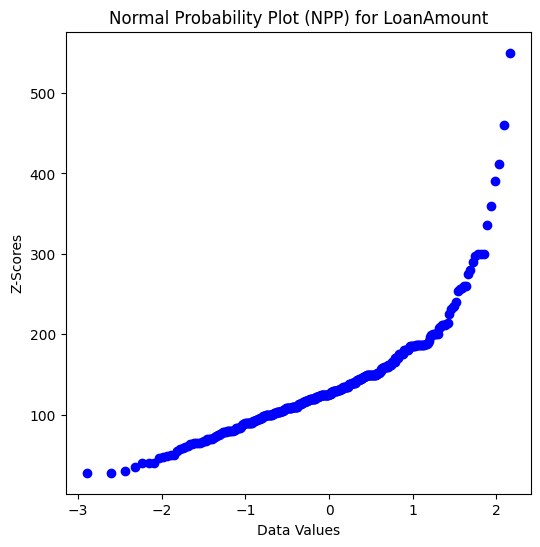

In [5]:

# TASK - 3

# 3.Create NPP for the "LoanAmount" column in given "Income.csv" dataset. Analyse and provide your insights.

import matplotlib.pyplot as plt
from scipy.stats import probplot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore, norm
dat = pd.read_csv("/content/Income.csv")
loan_data = dat['LoanAmount']

def create_npp(loan_data):
    plt.figure(figsize=(6, 6))
    probplot(loan_data,plot=plt)
    plt.xlabel('Data Values')
    plt.ylabel('Z-Scores')
    plt.title('Normal Probability Plot (NPP) for LoanAmount')
    plt.show()

# Generating NPP for LoanAmount column in Income.csv file
create_npp(loan_data)


In [6]:
# Analising the NPP
print("Insights:")
print("1.It suggests that the data follows a normal distribution.")
print("2.It is Right skewed Normal Probability Plot")

Insights:
1.It suggests that the data follows a normal distribution.
2.It is Right skewed Normal Probability Plot


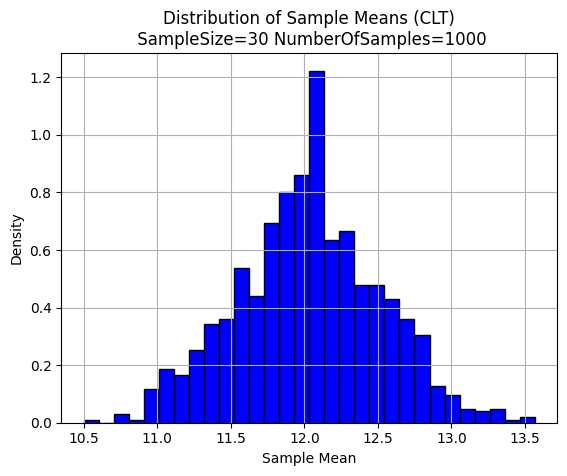

In [7]:
# TASK - 4  Consider n=30 and p=0.4 as parameters for an unknown binomial distribution. Implement central limit theorem, evaluate 1000 means of sample size 30 and plot the graph for obtained means. Analyse and provide insights about the graph plotted.

import numpy as np
import matplotlib.pyplot as plt
def simulate_clt(n,p,num_samples,sample_size):
    samples=np.random.binomial(n,p,(num_samples,sample_size))

    # Calculate the mean of each sample
    sample_means = np.mean(samples,axis=1)

    # Plot the histogram of sample means
    plt.hist(sample_means,bins=30,density=True,color='b',edgecolor='k')
    plt.xlabel('Sample Mean')
    plt.ylabel('Density')
    plt.title('Distribution of Sample Means (CLT)\n SampleSize=30 NumberOfSamples=1000')
    plt.grid(True)
    plt.show()

n=30
p=0.4
num_samples=1000
sample_size=30

# Plot Histogram using CLT
simulate_clt(n,p,num_samples,sample_size)


In [8]:
# Analising the NPP
print("Insights:")
print("1.The graph of sample means approximates a normal distribution")
print("2.This demonstrates the CLT, which states that the distribution approaches a normal distribution as the sample size increases.")
print("3.The histogram is approximately bell-shaped, which is a characteristic of a normal distribution.")

Insights:
1.The graph of sample means approximates a normal distribution
2.This demonstrates the CLT, which states that the distribution approaches a normal distribution as the sample size increases.
3.The histogram is approximately bell-shaped, which is a characteristic of a normal distribution.


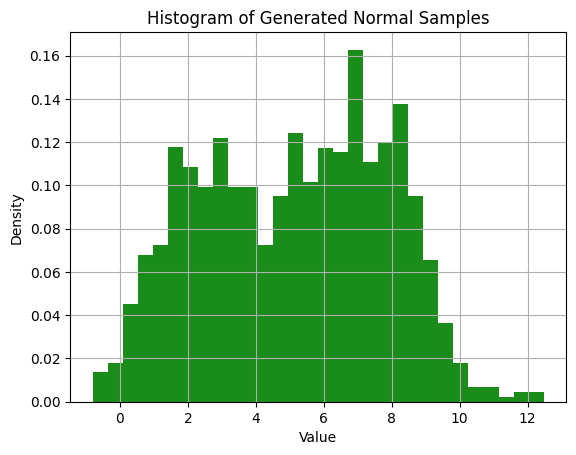

In [9]:
# TASK - 5 Generate random variables from a normal distribution (parameters: mean:5.0, standard deviation: 2.0 and number of samples:1000) using acceptance-rejection method. Plot a histogram of generated samples.

import numpy as np
import matplotlib.pyplot as plt

def generate_normal_samples(mean,std_devia,num_samples):
    samples = []
    max_density = 1/(std_devia*np.sqrt(2*np.pi))

    while len(samples)<num_samples:
        x = np.random.uniform(mean-3*std_devia,mean+4*std_devia)
        y = np.random.uniform(0,max_density)
        pdf_x = (1/(std_devia*np.sqrt(2*np.pi)))*np.exp(-((x-mean)**2)/(2*std_devia**2))
        if y <= pdf_x / max_density:
            samples.append(x)
    return samples

mean = 5.0
std_devia = 2.0
num_samples = 1000
samples = generate_normal_samples(mean, std_devia, num_samples)

# Plot a histogram of the generated samples
plt.hist(samples, bins=30, density=True, alpha=0.9, color='g')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Histogram of Generated Normal Samples')
plt.grid(True)
plt.show()
